# EDA of the Ford A Dataset
### What are we doing in this notebook ?
<b> In this notebook we are exploring the FordA datatset 
    
### What do we learn after performing the EDA ?
    <b> Dataset, based on the shape (4921, 1, 500), it seems to be a univariate (1D) time series dataset where each sample has 500 time points. The '1' in the shape indicates that each time point has only one feature, making it a 1D time series

In [ ]:
#importing the libraries 
import timeshap 
from aeon.datasets import load_classification
import numpy as np
import matplotlib.pyplot as plt


import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score
import numpy as np

from tslearn.neighbors import KNeighborsTimeSeriesClassifier
from sklearn.metrics import accuracy_score

In [2]:
import warnings

from aeon.registry import all_estimators

warnings.filterwarnings("ignore")
all_estimators("classifier", filter_tags={"algorithm_type": "deeplearning"})

[('CNNClassifier', aeon.classification.deep_learning.cnn.CNNClassifier),
 ('EncoderClassifier',
  aeon.classification.deep_learning.encoder.EncoderClassifier),
 ('FCNClassifier', aeon.classification.deep_learning.fcn.FCNClassifier),
 ('InceptionTimeClassifier',
  aeon.classification.deep_learning.inception_time.InceptionTimeClassifier),
 ('IndividualInceptionClassifier',
  aeon.classification.deep_learning.inception_time.IndividualInceptionClassifier),
 ('MLPClassifier', aeon.classification.deep_learning.mlp.MLPClassifier),
 ('ResNetClassifier',
  aeon.classification.deep_learning.resnet.ResNetClassifier),
 ('TapNetClassifier',
  aeon.classification.deep_learning.tapnet.TapNetClassifier)]

In [3]:

# Load a dataset by name
dataset_name = 'FordA'  # replace with the actual name of the dataset you wish to load
data = load_classification(dataset_name)

In [4]:
data


(array([[[-0.79717168, -0.66439208, -0.37301463, ..., -0.66439208,
          -1.0737958 , -1.5643427 ]],
 
        [[ 0.80485472,  0.63462859,  0.37347448, ..., -0.71488505,
          -0.56044294, -0.31908642]],
 
        [[ 0.7279851 ,  0.11128392, -0.49912439, ...,  0.39446303,
           0.33940042,  0.25539062]],
 
        ...,
 
        [[ 0.71008362,  0.59397882,  0.3818858 , ..., -0.12655282,
          -0.11782239, -0.18909413]],
 
        [[ 0.00684706, -0.14062427, -0.27059412, ..., -1.0007084 ,
          -1.0841075 , -1.109963  ]],
 
        [[-0.54135529, -0.24172258,  0.10074086, ..., -0.09362504,
          -0.90080431, -1.778341  ]]]),
 array(['-1', '1', '-1', ..., '1', '1', '1'], dtype='<U2'),
 {'problemname': 'forda',
  'timestamps': False,
  'missing': False,
  'univariate': True,
  'equallength': True,
  'classlabel': True,
  'targetlabel': False,
  'class_values': ['-1', '1']})

In [5]:
data[0].shape

(4921, 1, 500)

In [6]:
# Load the data using the function
data, labels, metadata = load_classification('FordA')  # Replace 'forda' with your specific dataset if needed

# Print the shapes of the data and labels
print("Data shape:", data.shape)
print("Labels shape:", labels.shape)

# Determine and print the number of unique classes
num_classes = len(np.unique(labels))
print("Number of classes:", num_classes)

# Optionally, print the metadata
print("Metadata:", metadata)


Data shape: (4921, 1, 500)
Labels shape: (4921,)
Number of classes: 2
Metadata: {'problemname': 'forda', 'timestamps': False, 'missing': False, 'univariate': True, 'equallength': True, 'classlabel': True, 'targetlabel': False, 'class_values': ['-1', '1']}


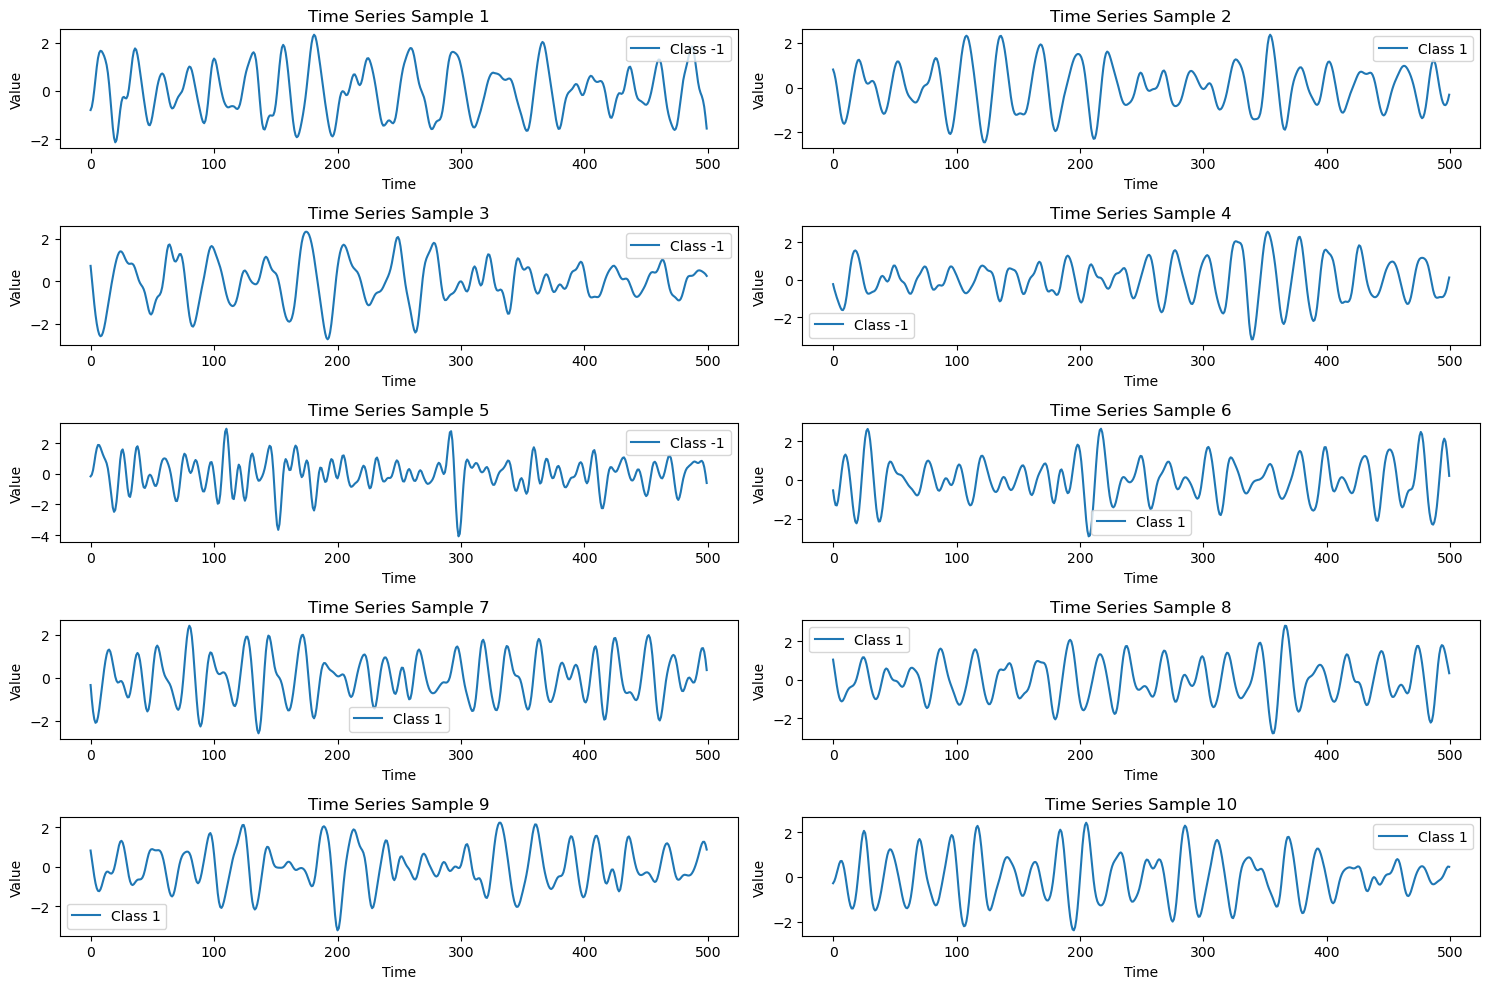

In [15]:
# Plot the first 10 time series
plt.figure(figsize=(15, 10))
for i in range(10):  # Plotting the first 10 samples
    plt.subplot(5, 2, i + 1)  # Arranging plots in 5 rows and 2 columns
    plt.plot(data[i, 0, :], label=f"Class {labels[i]}")
    plt.title(f"Time Series Sample {i+1}")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.legend()
plt.tight_layout()
plt.show()

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
X = np.array(data) # Your time series data
y = np.array(labels) # Your class labels

# Basic structure
print("Number of Samples:", X.shape[0])
print("Time Series Length:", X.shape[1])
print("Number of Features per Time Point:", X.shape[2])
print("Number of Classes:", np.unique(y).size)

# Checking the first few samples
print("First few class labels:", y[:10])


Number of Samples: 4921
Time Series Length: 1
Number of Features per Time Point: 500
Number of Classes: 2
First few class labels: ['-1' '1' '-1' '-1' '-1' '1' '1' '1' '1' '1']


In [9]:
print("Data shape:", data.shape)
print("Labels shape:", labels.shape)
num_classes = len(np.unique(labels))
print("Number of classes:", num_classes)


Data shape: (4921, 1, 500)
Labels shape: (4921,)
Number of classes: 2


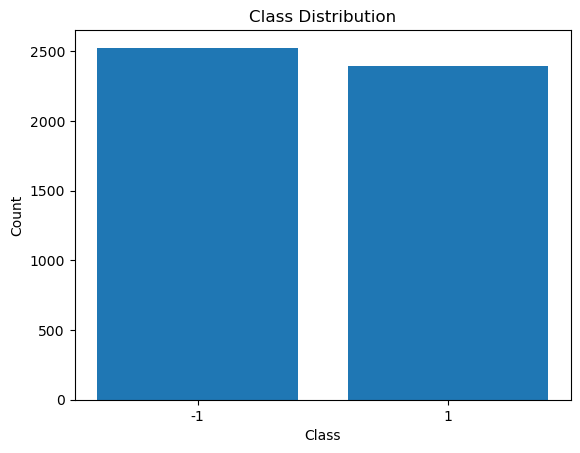

In [10]:
# Class distribution
classes, counts = np.unique(y, return_counts=True)
plt.bar(classes, counts)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [11]:
# Check for missing values
if np.isnan(X).any():
    print("There are missing values in the dataset.")
else:
    print("No missing values found in the dataset.")


No missing values found in the dataset.


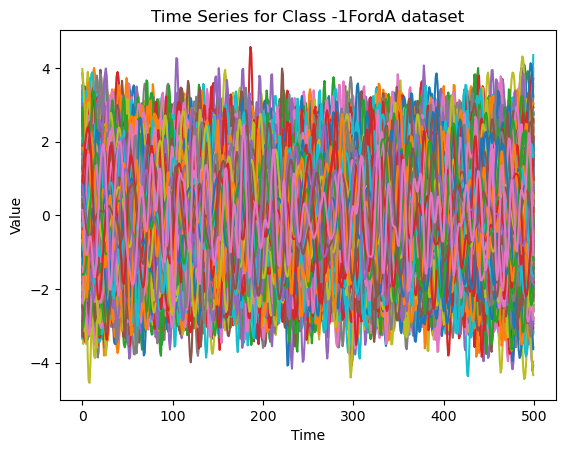

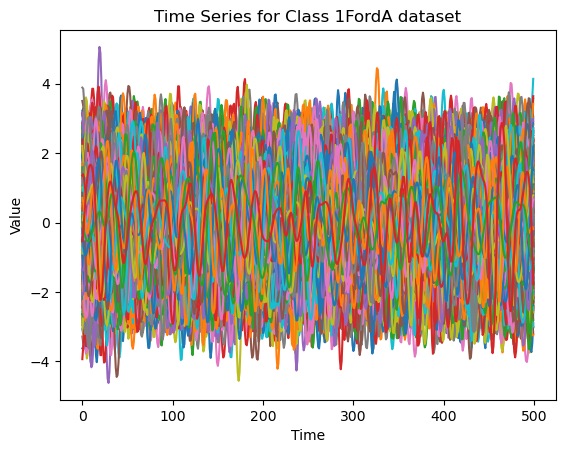

In [12]:

# Unpack the data
time_series_data, class_labels, metadata = load_classification('FordA')
# Convert class labels to integers
class_labels = class_labels.astype(int)


# Get the unique class labels
unique_labels = np.unique(class_labels)

# Plot each class separately
for label in unique_labels:
    class_indices = np.where(class_labels == label)[0]
    
    for idx in class_indices:
        plt.plot(time_series_data[idx, 0, :])  # Assuming 1D time series
        
    plt.title(f'Time Series for Class {label}FordA dataset')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.show()


In [13]:
# Define the sizes
train_size = 3601
test_size = 1320  # Make sure that train_size + test_size <= total number of samples

# Split the data
x_train = data[:train_size]
y_train = labels[:train_size]
x_test = data[train_size:train_size+test_size]
y_test = labels[train_size:train_size+test_size]


In [14]:
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)


Training data shape: (3601, 1, 500)
Training labels shape: (3601,)
Testing data shape: (1320, 1, 500)
Testing labels shape: (1320,)
